In [ ]:
import warnings

import matplotlib.pyplot as plt
import torch
from pyannote.audio import Pipeline

warnings.filterwarnings("ignore", category=UserWarning)

device = "cuda:0" if torch.cuda.is_available() else "cpu"

Модель

In [2]:
pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token="hf_LbzoqItQscelMeTBddXaDNoOECibhB",
).to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []


In [ ]:
def get_stat(file_name_of_lection):
    diarization = pipeline(file=file_name_of_lection)

    time_allocation = diarization.chart()
    t_lecturer = time_allocation[0][1]
    t_audience = sum([time_allocation[i][1] for i in range(1, len(time_allocation))])
    t_silence = (
        max([segment.end for segment in diarization.itersegments()])
        - t_lecturer
        - t_audience
    )

    timestamps_of_speakers = []
    for segment, _, speaker in diarization.itertracks(yield_label=True):
        timestamps_of_speakers.append(
            [speaker, round(segment.start, 2), round(segment.end, 2)]
        )

    lector_id = time_allocation[0][0]
    for i in range(len(timestamps_of_speakers)):
        if timestamps_of_speakers[i][0] == lector_id:
            timestamps_of_speakers[i][0] = "Lector"
        else:
            timestamps_of_speakers[i][0] = "Audience"

    return (
        [["Lecturer", t_lecturer], ["Audience", t_audience], ["Silence", t_silence]],
        timestamps_of_speakers,
        diarization,
    )

In [51]:
stat = get_stat("lection.mp3")

(-1.099995796967022,
 1.0999997998555724,
 -1.099999841454214,
 1.0999966705444386)

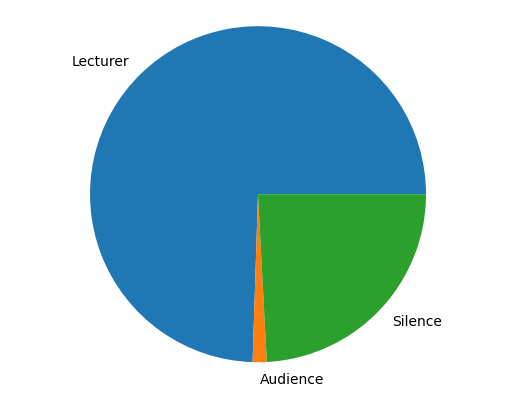

In [52]:
fig, ax = plt.subplots()
ax.pie([i[1] for i in stat[0]], labels=[i[0] for i in stat[0]])
ax.axis("equal")

In [53]:
stat[-2]

[['Audience', 9.19, 10.97],
 ['Lector', 10.97, 13.06],
 ['Lector', 13.73, 56.39],
 ['Lector', 56.75, 57.74],
 ['Lector', 58.35, 87.11],
 ['Lector', 87.65, 92.24],
 ['Lector', 92.4, 102.83],
 ['Lector', 102.97, 121.24],
 ['Lector', 121.73, 153.58],
 ['Lector', 153.69, 161.52],
 ['Lector', 161.66, 162.87],
 ['Lector', 165.0, 175.19],
 ['Lector', 175.4, 176.71],
 ['Lector', 178.37, 178.45],
 ['Lector', 182.33, 188.44],
 ['Lector', 188.9, 206.51],
 ['Lector', 207.51, 208.39],
 ['Lector', 209.38, 210.16],
 ['Lector', 210.45, 211.76],
 ['Lector', 212.32, 214.46],
 ['Lector', 215.88, 224.59],
 ['Audience', 218.8, 220.28],
 ['Lector', 225.92, 235.0],
 ['Lector', 235.71, 243.6],
 ['Lector', 244.14, 246.0],
 ['Lector', 247.67, 261.31],
 ['Lector', 262.2, 266.39],
 ['Lector', 266.77, 275.68],
 ['Lector', 276.33, 277.71],
 ['Lector', 278.79, 282.23],
 ['Lector', 284.04, 291.8],
 ['Lector', 292.56, 294.74],
 ['Lector', 295.98, 307.07],
 ['Lector', 307.83, 310.85],
 ['Lector', 312.24, 314.85],
 ['Le